In [6]:
import pyrealsense2 as rs
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
preview = True
SERIAL = '830112071475'

In [3]:
config = rs.config()
resolution_width = 480
resolution_height = 270
framerate = 90
config.enable_stream(rs.stream.infrared, 1, resolution_width, resolution_height, rs.format.y8, framerate)
config.enable_stream(rs.stream.infrared, 2, resolution_width, resolution_height, rs.format.y8, framerate)
config.enable_device(SERIAL)

pipe = rs.pipeline()
prof = pipe.start(config)
dev = prof.get_device()
ds = dev.query_sensors()[0]
ds.set_option(rs.option.inter_cam_sync_mode, 1)
# ds.set_option(rs.option.frames_queue_size,1)
print(ds.get_option(rs.option.inter_cam_sync_mode))

framecount = 0

1.0


In [4]:
start_t = time.perf_counter()
frames = pipe.wait_for_frames(1000*15)


In [5]:
time_acq = time.perf_counter() - start_t
cputime = time.time()
framecount = frames.get_frame_number()
# by default, milliseconds from 1970. convert to seconds for datetime.datetime
arrival_time = frames.get_frame_metadata(rs.frame_metadata_value.time_of_arrival)/1000
timestamp = frames.get_timestamp()

In [8]:
datetime.fromtimestamp(timestamp/1000)

datetime.datetime(2019, 3, 18, 18, 15, 38, 882595)

In [96]:
2**32-2**32/2

2147483648.0

In [72]:
frame1 = pipe.wait_for_frames(1000*15)
frame2 = pipe.wait_for_frames(1000*15)

In [73]:
frame2.get_timestamp() - frame1.get_timestamp()

11.230712890625

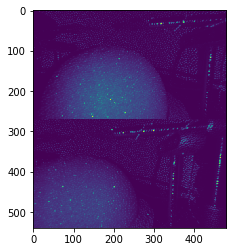

In [18]:
left = frames.get_infrared_frame(1)
right = frames.get_infrared_frame(2)

left, right = np.asanyarray(left.get_data()), np.asanyarray(right.get_data())

out = np.vstack((left,right))
fig, ax = plt.subplots(1,1)
ax.imshow(out)
plt.show()

In [85]:
frames.get_frame_metadata(rs.frame_metadata_value.frame_counter)

RuntimeError: metadata not available

In [81]:
arrival_time = frames.get_frame_metadata(rs.frame_metadata_value.time_of_arrival)

1552944062666

In [82]:
datetime.fromtimestamp((frame1.get_timestamp()/1000))

datetime.datetime(2019, 3, 18, 17, 51, 45, 138600)

In [84]:
arrival_time = frame1.get_frame_metadata(rs.frame_metadata_value.time_of_arrival)
datetime.fromtimestamp((arrival_time/1000))

datetime.datetime(2019, 3, 18, 17, 51, 45, 138000)

In [52]:
frames.get_frame_metadata(rs.frame_metadata_value.backend_timestamp)

1552944062645

In [64]:
frame1.get_frame_number()

295299

In [65]:
frame2.get_frame_number()

295300

In [66]:
frame1.get_timestamp()

1552945849356.8357

In [67]:
frame2.get_timestamp() - frame1.get_timestamp()

11.135009765625

In [77]:
frame2.get_timestamp()

1552945905149.8308

In [80]:
datetime.fromtimestamp((frames.get_timestamp()/1000))

datetime.datetime(2019, 3, 18, 17, 21, 2, 666629)

In [79]:
1552945905149.8308/1000/60/60/24/365

49.24359161434015

In [57]:
frames.get_frame_timestamp_domain()

timestamp_domain.system_time

In [76]:
int(frames.get_timestamp())

1552944062666

In [75]:
datetime.fromtimestamp(int(frames.get_timestamp()))

OSError: [Errno 22] Invalid argument

In [74]:
datetime.utcfromtimestamp(int(frames.get_timestamp()))

OSError: [Errno 22] Invalid argument

In [43]:
dir(frames)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'as_depth_frame',
 'as_frame',
 'as_frameset',
 'as_motion_frame',
 'as_points',
 'as_pose_frame',
 'as_video_frame',
 'data',
 'first',
 'first_or_default',
 'foreach',
 'frame_number',
 'frame_timestamp_domain',
 'get_color_frame',
 'get_data',
 'get_depth_frame',
 'get_fisheye_frame',
 'get_frame_metadata',
 'get_frame_number',
 'get_frame_timestamp_domain',
 'get_infrared_frame',
 'get_pose_frame',
 'get_profile',
 'get_timestamp',
 'is_depth_frame',
 'is_frame',
 'is_frameset',
 'is_motion_frame',
 'is_points',
 'is_pose_frame',
 'is_video_frame',
 'keep',
 'profile',
 'size',
 'supports_frame_metadat

In [36]:
from datetime import datetime

In [42]:
datetime.utcfromtimestamp(int(arrival_time))

OSError: [Errno 22] Invalid argument

In [39]:
print(.strftime('%Y-%m-%d %H:%M:%S'))

OSError: [Errno 22] Invalid argument

In [7]:
md = frames.get_frame_metadata()

TypeError: get_frame_metadata(): incompatible function arguments. The following argument types are supported:
    1. (self: pyrealsense2.pyrealsense2.frame, frame_metadata: pyrealsense2.pyrealsense2.frame_metadata_value) -> int

Invoked with: <pyrealsense2.pyrealsense2.composite_frame object at 0x00000290776B0848>

In [8]:
dir(rs.frame_metadata_value)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__lt__',
 '__members__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'actual_exposure',
 'actual_fps',
 'auto_exposure',
 'auto_white_balance_temperature',
 'backend_timestamp',
 'backlight_compensation',
 'brightness',
 'contrast',
 'exposure_priority',
 'exposure_roi_bottom',
 'exposure_roi_left',
 'exposure_roi_right',
 'exposure_roi_top',
 'frame_counter',
 'frame_laser_power',
 'frame_laser_power_mode',
 'frame_timestamp',
 'gain_level',
 'gamma',
 'hue',
 'low_light_compensation',
 'manual_white_balance',
 'power_line_frequency',
 'saturation',
 'sensor_timestamp',
 'sharpness',
 'temperature',
 'time_of_arrival',
 'white_balance']